# Introduction


Ocular Disease Recognition dataset

* Normal (N);  
* Diabetes (D);  
* Glaucoma (G);  
* Cataract (C);  
* AMD (A);  
* Hypertension (H);  
* Myopia (M);
* Other diseases/abnormalities (O)  


This project focuses on Cataract.


# Data Preprocessing

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shashidhargadepalli","key":"daa7ceb09fdf86b2cda1ad4b529aa0cf"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d andrewmvd/ocular-disease-recognition-odir5k


Dataset URL: https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k
License(s): other
100% 1.62G/1.62G [00:15<00:00, 187MB/s]
100% 1.62G/1.62G [00:15<00:00, 111MB/s]


In [4]:
!unzip ocular-disease-recognition-odir5k.zip -d odir_data


Streaming output truncated to the last 5000 lines.
  inflating: odir_data/preprocessed_images/2179_left.jpg  
  inflating: odir_data/preprocessed_images/2179_right.jpg  
  inflating: odir_data/preprocessed_images/217_left.jpg  
  inflating: odir_data/preprocessed_images/217_right.jpg  
  inflating: odir_data/preprocessed_images/2180_left.jpg  
  inflating: odir_data/preprocessed_images/2180_right.jpg  
  inflating: odir_data/preprocessed_images/2181_left.jpg  
  inflating: odir_data/preprocessed_images/2181_right.jpg  
  inflating: odir_data/preprocessed_images/2182_left.jpg  
  inflating: odir_data/preprocessed_images/2182_right.jpg  
  inflating: odir_data/preprocessed_images/2183_left.jpg  
  inflating: odir_data/preprocessed_images/2183_right.jpg  
  inflating: odir_data/preprocessed_images/2184_left.jpg  
  inflating: odir_data/preprocessed_images/2184_right.jpg  
  inflating: odir_data/preprocessed_images/2185_left.jpg  
  inflating: odir_data/preprocessed_images/2185_right.jpg  

In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv("/content/odir_data/full_df.csv")
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [8]:
def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0

In [9]:
df["left_cataract"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df["right_cataract"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))

In [10]:
left_cataract = df.loc[(df.C ==1) & (df.left_cataract == 1)]["Left-Fundus"].values
left_cataract[:15]

array(['0_left.jpg', '81_left.jpg', '103_left.jpg', '119_left.jpg',
       '254_left.jpg', '294_left.jpg', '330_left.jpg', '448_left.jpg',
       '465_left.jpg', '477_left.jpg', '553_left.jpg', '560_left.jpg',
       '594_left.jpg', '611_left.jpg', '625_left.jpg'], dtype=object)

In [11]:
right_cataract = df.loc[(df.C ==1) & (df.right_cataract == 1)]["Right-Fundus"].values
right_cataract[:15]

array(['24_right.jpg', '81_right.jpg', '112_right.jpg', '188_right.jpg',
       '218_right.jpg', '345_right.jpg', '354_right.jpg', '477_right.jpg',
       '553_right.jpg', '560_right.jpg', '625_right.jpg', '726_right.jpg',
       '769_right.jpg', '949_right.jpg', '955_right.jpg'], dtype=object)

In [12]:
left_normal = df.loc[(df.C ==0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(250,random_state=42).values
right_normal = df.loc[(df.C ==0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(250,random_state=42).values
right_normal[:15]

array(['2964_right.jpg', '680_right.jpg', '500_right.jpg',
       '2368_right.jpg', '2820_right.jpg', '2769_right.jpg',
       '2696_right.jpg', '2890_right.jpg', '940_right.jpg',
       '2553_right.jpg', '3371_right.jpg', '3042_right.jpg',
       '919_right.jpg', '3427_right.jpg', '379_right.jpg'], dtype=object)

In [13]:
cataract = np.concatenate((left_cataract,right_cataract),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)

In [14]:
print(len(cataract),len(normal))

594 500


In [19]:
import cv2
import random
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img,img_to_array
dataset_dir = "/content/odir_data/ODIR-5K/ODIR-5K/Training Images"
image_size=224
labels = []
dataset = []
def create_dataset(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue

        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset

In [20]:
dataset = create_dataset(cataract,1)
len(dataset)

100%|██████████| 594/594 [00:11<00:00, 53.60it/s]


594

In [21]:
dataset = create_dataset(normal,0)
len(dataset)

100%|██████████| 500/500 [00:12<00:00, 41.04it/s]


1094

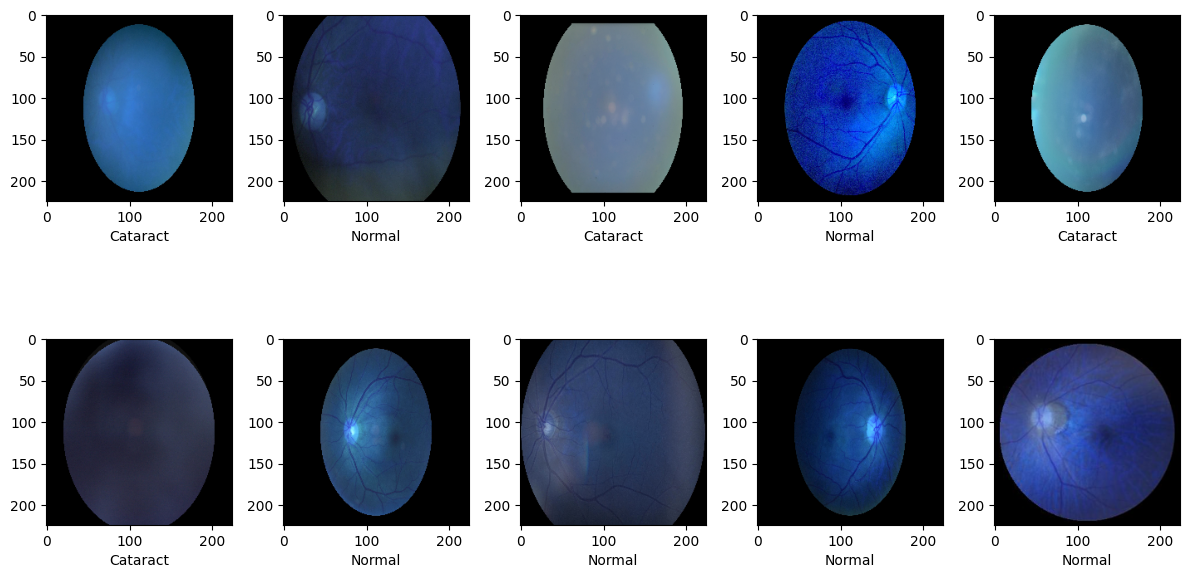

In [24]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout()

In [25]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [27]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [28]:
for layer in vgg.layers:
    layer.trainable = False

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model1 = Sequential()
model1.add(vgg)
model1.add(Flatten())
model1.add(Dense(1,activation="sigmoid"))
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 7, 7, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          25,089 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,049,473 (76.48 MB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [30]:
model1.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [38]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg19.keras",monitor="val_acc",verbose=1,save_best_only=True,
                             save_weights_only=False)
earlystop = EarlyStopping(monitor="val_acc",patience=5,verbose=1,mode ='max')

In [39]:
history1 = model1.fit(x_train,y_train,batch_size=32,epochs=15,validation_data=(x_test,y_test),
                    verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - accuracy: 0.9350 - loss: 0.8791 - val_accuracy: 0.9635 - val_loss: 0.4648
Epoch 2/15


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 190ms/step - accuracy: 0.9630 - loss: 0.2741 - val_accuracy: 0.9680 - val_loss: 0.2822
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 204ms/step - accuracy: 0.9953 - loss: 0.0460 - val_accuracy: 0.9680 - val_loss: 0.2894
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 204ms/step - accuracy: 0.9946 - loss: 0.0372 - val_accuracy: 0.9726 - val_loss: 0.1941
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - accuracy: 0.9894 - loss: 0.0264 - val_accuracy: 0.9772 - val_loss: 0.2004
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 208ms/step - accuracy: 0.9860 - loss: 0.0862 - val_accuracy: 0.9680 - val_loss: 0.2438
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - accuracy: 0.9954 - loss: 0.0331 - val_accuracy: 0.9772 - val_loss: 0.2205
Epoch 8/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - accuracy: 0.9949 - loss: 0.0163 - val_accuracy: 0.9772 - val_loss: 0.2634
Epoch 9/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - accuracy: 0.9978 - loss: 0.0090 - val_accuracy: 0.9772 - 

In [40]:
loss,accuracy = model1.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.9663 - loss: 0.3102
loss: 0.22384889423847198
Accuracy: 0.9771689772605896


In [41]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred1 = (model1.predict(x_test) > 0.5).astype("int32")
accuracy_score(y_test, y_pred1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step


0.9771689497716894

In [42]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       114
           1       0.97      0.98      0.98       105

    accuracy                           0.98       219
   macro avg       0.98      0.98      0.98       219
weighted avg       0.98      0.98      0.98       219

